# Ejercicio 1
Realice un programa que permita el entrenamiento y prueba de un perceptrón simple con una cantidad variable de
entradas. El programa debe proveer las siguientes facilidades:
 1. lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas
 2. selección del criterio de finalización del entrenamiento,
 3. selección del número máximo de épocas de entrenamiento,
 4. selección de la tasa de aprendizaje,
 5. prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.

Realizar la prueba: Recuerde que para que la prueba tenga validez se deben utilizar patrones nunca presentados en el entrenamiento, para esto se dispone de dos archivos diferentes para cada problema.

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Train

In [5]:
def perceptron_simple_train(ds_train,N,nu,gamma,N_valid):

    idx=np.random.choice(range(ds_train.shape[0]), ds_train.shape[0], replace = False)
    idx_valid = idx[:N_valid]
    idx_train = idx[N_valid:]

    # inicializacion de pesos al azar: distribución uniforme
    # w = np.random.rand(ds_train.shape[1]) - 0.5

    # inicialización al azar de los pesos con distribución normal
    # loc -> media - scale -> desvío
    w = np.random.normal(loc = 0, scale = 0.15, size = ds_train.shape[1]) 

    error_epocas = []
    w_epocas = w

    x = np.hstack((-1*np.ones((ds_train.shape[0],1)), ds_train))


    # épocas
    for i in range(N):
        for patron in x[idx_train]:
            a = patron
            # producto punto
            y = np.dot(patron[:-1],w)
            # No linealidad
            if (y > 0):
                y = 1
            else:
                y = -1
            # Actualización de pesos
            w = w + patron[:-1] * gamma * (patron[-1] - y)

        # Validación
        errores = 0
        for j in x[idx_valid]:
            # producto punto
            y = np.dot(j[0:len(j)-1],w)
            
            # No linealidad
            if (y > 0 and 1 != j[len(j)-1]):
                errores += 1
            elif (y <= 0 and -1 != j[len(j)-1]):
                errores += 1
        error = (errores/N_valid)

        error_epocas= np.append(error_epocas, [error])
        w_epocas = np.vstack((w_epocas, w))
        
        # print(f'Epoca {i}: error = {error}, w = {w}')
        if (error < nu):
            print(f'Época {i}')
            return w_epocas, error_epocas
    print(f'Época {i}')
    return w_epocas, error_epocas

In [6]:
import numpy as np
np.vstack(([2, 3], [1, 2]))

array([[2, 3],
       [1, 2]])

## Test

In [7]:
def perceptron_test(ds_test,w):
    errores = 0
    for j in ds_test:
        j = np.concatenate([[-1], j])
        # Convolución
        y = np.dot(j[0:len(j)-1],w)
        # No linealidad
        if (y > 0 and 1 != j[len(j)-1]):
            errores += 1
        elif (y <= 0 and -1 != j[len(j)-1]):
            errores += 1
    return (errores/ds_test.shape[0])


## Graficación

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [8]:
import time
import matplotlib.animation as animation

In [9]:
def graficar(x, y, x_color, w_vec, error):
    
    N_epocas = w_vec.shape[0]
    x_recta = np.arange(-3, 3, 0.01)
    pendiente = -w_vec[0,1]/w_vec[0,2]
    ordenada = w_vec[0,0]/w_vec[0,2]
    recta =  ordenada + pendiente * x_recta
    fig, ax = plt.subplots(figsize=(4,3))
    line1, = ax.plot(x_recta, recta)
    ax.grid()
    ax.scatter(x, y, c = x_color)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    def animate(i):
        pendiente = -w_vec[i,1]/w_vec[i,2]
        ordenada = w_vec[i,0]/w_vec[i,2]
        recta =  ordenada + pendiente * x_recta
        line1.set_ydata(recta)
        plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error[i]}')
        time.sleep(0.2)
        return line1,
    
    anim = animation.FuncAnimation(fig, animate, frames=(N_epocas), interval=20, repeat=False)
    plt.show()
    #pause
    anim.event_source.stop()



## Problema OR
### Train

In [10]:
# lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

# Entrenamiento
N = 50 # Epocas
gamma = 0.00001 # Tasa de aprendizaje
nu = 0.0005 # Umbral de error
N_valid = 200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)



Época 20


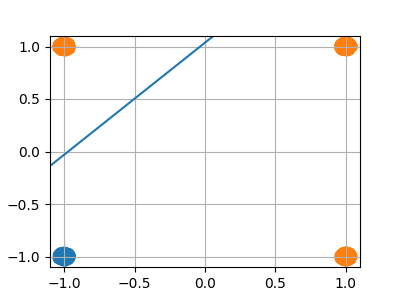

In [11]:
# Gráfico evolución del entrenamiento

x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
%matplotlib widget
graficar(x_x, x_y, x_color, historial_w, errores_evol)


In [12]:
%matplotlib inline

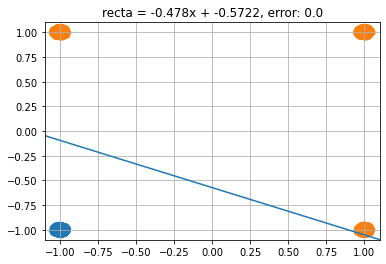

In [13]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -historial_w[-1,1]/historial_w[-1,2]
ordenada = historial_w[-1,0]/historial_w[-1,2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_train[:,0] < 0, np.where(ds_train[:,1] < 0, 'C0', 'C1'), 'C1')
plt.scatter(ds_train[:,0], ds_train[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {errores_evol[-1]}')

plt.show()

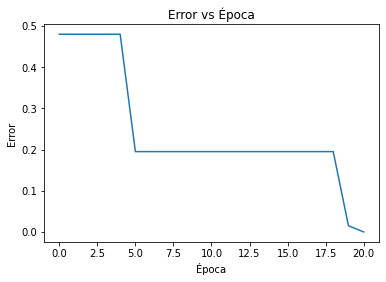

In [14]:
# Gráfico de error vs. época para el train

plt.close('all')
plt.title('Error vs Época')
plt.xlabel('Época')
plt.ylabel('Error')
plt.plot(range(len(errores_evol)),errores_evol)
plt.show()

### Test

In [15]:
# Test

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')


Error de test: 0.005


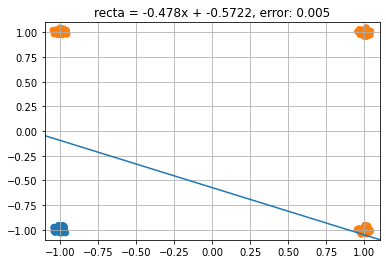

In [16]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -w[1]/w[2]
ordenada = w[0]/w[2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_test[:,0] < 0, np.where(ds_test[:,1] < 0, 'C0', 'C1'), 'C1')
plt.scatter(ds_test[:,0], ds_test[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error}')

plt.show()

## Problema XOR
### Train

In [17]:
# Lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/XOR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

# Entrenamiento
N = 50 # Epocas
gamma = 0.001 # Tasa de aprendizaje
nu = 0.3 # Umbral de error
N_valid=200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)

Época 0


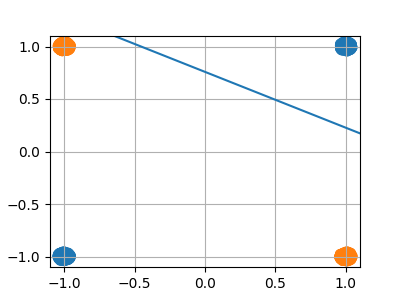

In [18]:
# Gráfico de evolución del entrenamiento

x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x > 0, np.where(x_y > 0, 'C0', 'C1'), np.where(x_y < 0, 'C0', 'C1'))
%matplotlib widget
graficar(x_x, x_y, x_color, historial_w, errores_evol)

In [19]:
%matplotlib inline

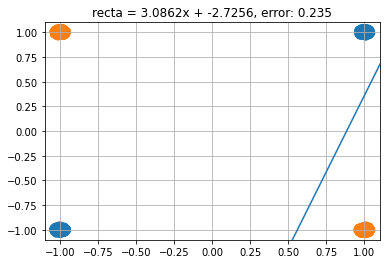

In [20]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -historial_w[-1,1]/historial_w[-1,2]
ordenada = historial_w[-1,0]/historial_w[-1,2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()
x_color = np.where(ds_train[:,0] > 0, np.where(ds_train[:,1] > 0, 'C0', 'C1'), np.where(ds_train[:,1] < 0, 'C0', 'C1'))
plt.scatter(ds_train[:,0], ds_train[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {errores_evol[-1]}')

plt.show()

### Test

In [21]:
ds_test = np.genfromtxt('icgtp1datos/XOR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Test
w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')

Error de test: 0.26


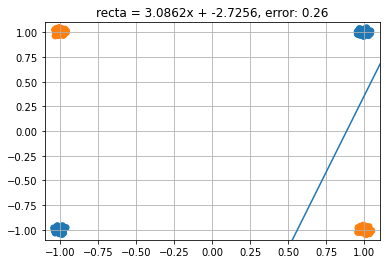

In [22]:
x_recta = np.arange(-3, 3, 0.01)
pendiente = -w[1]/w[2]
ordenada = w[0]/w[2]
recta =  ordenada + pendiente * x_recta

plt.figure()
plt.plot(x_recta, recta)
plt.grid()

x_color = np.where(ds_test[:,0] > 0, np.where(ds_test[:,1] > 0, 'C0', 'C1'), np.where(ds_test[:,1] < 0, 'C0', 'C1'))
plt.scatter(ds_test[:,0], ds_test[:,1], c = x_color)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error}')

plt.show()

# Ejercicio 2
## Generación de particiones

In [23]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)


## Validación cruzada con 5 particiones
El archivo $spheres1d10.csv$ contiene una serie de datos generados a partir de los valores de la Tabla 1, con pequeñas desviaciones aleatorias ($< 10 %$) en torno a ellos. 
Realice con estos datos la validación cruzada del perceptrón simple con $5$ particiones de entrenamiento y prueba con relacion $80/20$

Época 49
Época 36
Época 22
Época 49
Época 49


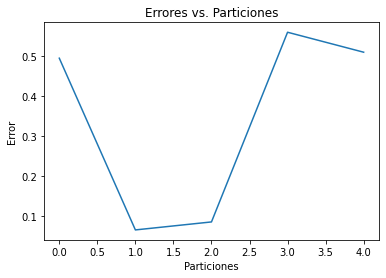

In [24]:
num_particiones=5
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', num_particiones, 0.2)

# for i in range(num_particiones):
#     np.savetxt(f'icgtp1datos\spheres1d10-part{i}_test.csv', ds[M_tst[i]], delimiter=',')
#     np.savetxt(f'icgtp1datos\spheres1d10-part{i}_trn.csv', ds[M_trn[i]], delimiter=',')

ds_size = ds.shape[0]

w_particion=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],50,0.13,0.01,500)
    w_particion[i] = historial_w[-1]

errores=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores[i]= perceptron_test(ds[particion],w_particion[i])

plt.close('all')
plt.plot(range(num_particiones),errores)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

## Validación cruzada con 10 particiones
A partir de la misma tabla del ejemplo anterior, pero modificando el punto x = [−1 + 1 −1] → yd = 1, se ha generado un conjunto de datos diferente. Los archivos spheres2d10.csv, spheres2d50.csv y spheres2d70.csv contienen los datos con desviaciones aleatorias de 10, 50 y 70 % respectivamente (Figuras 2(b), 2(c) y 2(d)). 

Realice la validación cruzada del perceptrón simple con 10 particiones de entrenamiento y prueba, con relación 80/20.


In [25]:
num_particiones=10
#particion de 10% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d10=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],20,0.03,0.001,500)                       
    w_particion_2d10[i]= historial_w[-1]

errores_2d10=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d10[i]= perceptron_test(ds[particion],w_particion_2d10[i])

#particion de 50% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d50.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d50=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],40,0.05,0.0001,500)                       
    w_particion_2d50[i]= historial_w[-1]


errores_2d50=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d50[i]= perceptron_test(ds[particion],w_particion_2d50[i])

#particion de 70% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d70.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d70=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],100,0.05,0.1,500)                       
    w_particion_2d70[i] = historial_w[-1]


errores_2d70=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d70[i]= perceptron_test(ds[particion],w_particion_2d70[i])

Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 3
Época 1
Época 1
Época 1
Época 0
Época 0
Época 1
Época 1
Época 1
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0


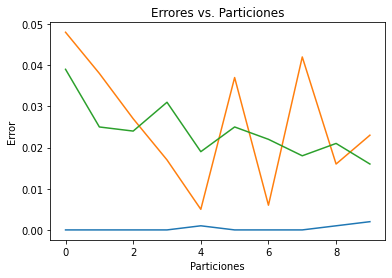

In [26]:
plt.close('all')
plt.plot(range(num_particiones),errores_2d10)
plt.plot(range(num_particiones),errores_2d50)
plt.plot(range(num_particiones),errores_2d70)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

In [27]:
print(f'media desviación 10%: {np.mean(errores_2d10):.4f} - desvío: {np.std(errores_2d10):.4f}')
print(f'media desviación 50%: {np.mean(errores_2d50):.4f} - desvío: {np.std(errores_2d50):.4f}')
print(f'media desviación 70%: {np.mean(errores_2d70):.4f} - desvío: {np.std(errores_2d70):.4f}')

media desviación 10%: 0.0004 - desvío: 0.0007
media desviación 50%: 0.0259 - desvío: 0.0143
media desviación 70%: 0.0240 - desvío: 0.0064


In [39]:
class neuron:
    def __init__(self, layer, x,w_in):
        self.layer=layer
        self.w_out=[]
        self.x=x
        self.w_in=w_in
        self.y=np.dot(w_in,x)
    
    def connect (self,neuron_conection,num_neuron):
        w=[]
        for i in range(len(neuron_conection)):
            w.append(neuron_conection[i].w_in[num_neuron])
        self.w_out=w 
    def calculate_y(self):
        self.y= np.dot(self.w_in,self.x)   


In [29]:
print(np.random.normal(loc = 0, scale = 0.15, size =1))
print(np.random.normal(loc = 0, scale = 0.15, size =1))
print(np.random.normal(loc = 0, scale = 0.15, size =1))

[-0.15509653]
[-0.07957741]
[-0.07455266]


In [30]:
def perceptron_multilayer_init(N_layers,neurons_perLayer,filename):
    ds, M_tst, M_trn  =  generar_particiones(filename, 1, 0.2)
    X = ds[M_trn[0,:], :-1]
    Y_d = ds[M_trn[0,:], ds.shape[1]-1]
    W_perLayer=[]
    network=[]
    X=np.hstack((-1*np.ones((X.shape[0],1)), X))
    #sacar de aca para arriba afuera de esta funcion y agregtar el sesgo a las otras capas
    x=X[0]
    layer_aux=[]
    # completa la primera capa
    for i in range(neurons_perLayer[0]):
        n=neuron(0,x,np.random.normal(loc = 0, scale = 0.15, size =len(x)))
        layer_aux.append(n)
    network.append(layer_aux)
    #termina de completar las capas siguientes con la salidas de las capas anteriores
    for layer in range(1,N_layers):
        layer_aux=[]
        y_aux=[]
        #for que hace un vector con todas las salidas de la capa anterior
        for neuron_prev in network[layer-1]:
            y_aux.append(neuron_prev.y)
        #for que crea todas la neuronas de la capa actual
        for i in range(neurons_perLayer[layer]):
            n=neuron(layer,y_aux,np.random.normal(loc = 0, scale = 0.15, size =len(y_aux)))
            layer_aux.append(n)
        network.append(layer_aux)
    return(network,X,Y_d)

In [38]:
def connect_network(network,N_layers,neurons_perLayer):
    for layer in range(N_layers-1):
        for neurona in range(neurons_perLayer[layer]):
            network[layer][neurona].connect(network[layer+1],neurona)
    return(network)


In [31]:
def perceptron_multilayer_forward(network,N_layers,neurons_perLayer,x):
    layer_aux=[]
    # completa la primera capa
    for i in range(neurons_perLayer[0]):
        network[0][i].x=x
        network[0][i].calculate_y()
    for layer in range(1,N_layers):
        y_aux=[]
        for neuron_prev in network[layer-1]:
            y_aux.append(neuron_prev.y)
        for i in range(neurons_perLayer[layer]):
           network[layer][i].x=y_aux
           network[layer][i].calculate_y()
    return(network)
    


In [41]:
m_network,X,y_d=perceptron_multilayer_init(2,[2,1],'icgtp1datos/concentlite.csv')

m_network=connect_network(m_network,2,[2,1])
print(m_network[1][0].w_in)
print(m_network[0][0].w_out)
print(m_network[0][1].w_out)
l_network=perceptron_multilayer_forward(m_network,2,[2,1],X[0])


[-0.15793836  0.14372702]
[-0.15793836032739403]
[0.1437270237540826]


In [33]:
#w=np.random.normal(loc = 0, scale = 0.15, size =2)
neurona_1=neuron(0,[1,2],np.random.normal(loc = 0, scale = 0.15, size =2))
#w=np.random.normal(loc = 0, scale = 0.15, size =2)
neurona_2=neuron(0,[3,4],np.random.normal(loc = 0, scale = 0.15, size =2))

print(neurona_1.w_in)
print(neurona_2.w_in)

w=np.random.normal(loc = 0, scale = 0.15, size =2)
y1=[neurona_1.y,neurona_2.y]
neurona_3=neuron(1,y1,w)
w=np.random.normal(loc = 0, scale = 0.15, size =2)
neurona_4=neuron(1,y1,w)
w=np.random.normal(loc = 0, scale = 0.15, size =2)
y2=[neurona_3.y,neurona_4.y]
neurona_5=neuron(2,y2,w)
network=[[neurona_1,neurona_2],[neurona_3,neurona_4],[neurona_5]]
#print(neurona_1.y) 
#print(neurona_2.y) 
#print(neurona_3.x) 
for layer in range(2):
    for i in range(len(network[layer])):
        network[layer][i].conect(network[layer+1],i)
print(neurona_3.w_out) 
print(neurona_4.w_out) 
print(neurona_5.w_in) 



[0.16903413 0.12958312]
[-0.04376725 -0.17765467]
[0.07166512945520101]
[0.0004276931743484547]
[0.07166513 0.00042769]


In [34]:
np.random.rand(2) - 0.5


array([ 0.48016724, -0.30395691])

In [35]:
a=[[1,2],[3,4]]
b=[-1,1]
print(np.dot(a[0],b[0]))

[-1 -2]
